In [14]:
import mne 
import os
import mne 
from mne.io import  read_raw_edf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from source import data_import
import pyarrow as pa


In [15]:
# to load it with memory mapping
p_df_mem = data_import.load_pyarrow(file_name="my_data")
p_df_mem.shape

/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/source/../data/my_data.arrow was loaded.


(42030080, 26)

In [16]:
p_df_mem.head()

channel,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,is_seizure,before_seizure,ECG
0 days 00:00:00,-17.777778,39.267399,-3.711844,8.400488,-0.586081,4.102564,37.704518,-15.042735,-17.387057,-45.128205,...,-18.559219,85.372405,4.102564,20.903541,-9.181929,-39.65812,-59.97558,False,False,NaN
0 days 00:00:00.003906250,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.19536,False,False,NaN
0 days 00:00:00.007812500,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.19536,False,False,NaN
0 days 00:00:00.011718750,0.586081,0.195360,0.195360,0.195360,0.195360,0.195360,0.586081,-0.195360,0.195360,0.586081,...,0.586081,0.586081,0.195360,1.367521,-0.195360,-0.19536,0.19536,False,False,NaN
0 days 00:00:00.015625,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,-0.195360,0.195360,0.19536,0.19536,False,False,NaN


In [17]:
#Mean 
grouped_mean = p_df_mem.groupby(['is_seizure']).mean()

In [18]:
grouped_mean.head()

channel,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,before_seizure,ECG
is_seizure,,,,,,,,,,,,,,,,,,,,,
False,0.189653,0.242873,0.129433,0.199323,0.199875,0.181789,0.169035,0.196196,0.230849,0.181185,...,0.182472,0.238524,0.191778,0.261287,0.139566,0.191565,0.230682,0.137974,0.062311,0.241945
True,0.312009,0.229639,0.173109,0.280182,0.286105,0.208715,0.209429,0.257958,0.219311,0.212095,...,0.265691,0.197924,0.271462,0.217612,0.114373,0.237109,0.137408,0.208123,0.010526,0.160495


In [19]:
grouped_mean = p_df_mem.groupby(['is_seizure']).mean().reset_index()
grouped_mean.head()
grouped_mean = grouped_mean.drop(['before_seizure', 'ECG'], axis =1)
melted_data = pd.melt(grouped_mean, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Mean')

melted_data.sort_values(by = 'Mean', ascending=False)

,is_seizure,Channel,Mean
1,True,FP1-F7,0.312009
9,True,FP1-F3,0.286105
7,True,P7-O1,0.280182
35,True,CZ-PZ,0.271462
31,True,P8-O2,0.265691
36,False,P7-T7,0.261287
15,True,P3-O1,0.257958
2,False,F7-T7,0.242873
26,False,F8-T8,0.241688
32,False,FZ-CZ,0.238524


In [20]:
melted_data.shape

(46, 3)

<Figure size 1200x600 with 0 Axes>

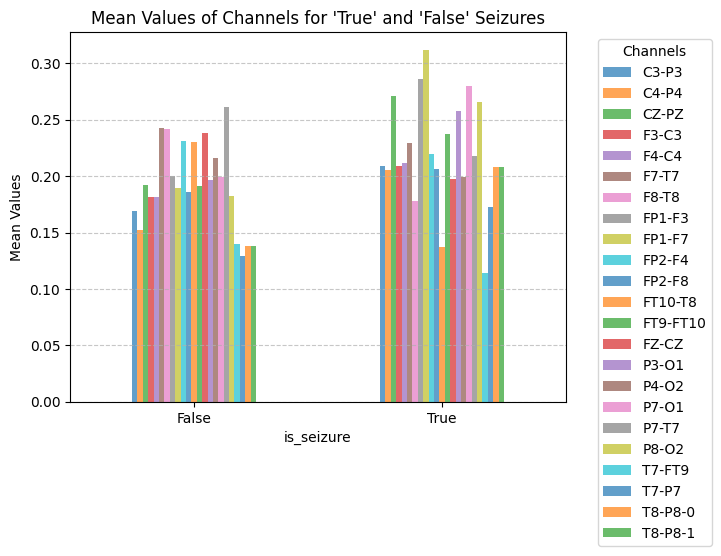

In [21]:

# Pivot the DataFrame to have channels as columns and 'is_seizure' as the index
pivoted_df = melted_data.pivot(index='is_seizure', columns='Channel', values='Mean')

# Create a bar plot for Mean 
plt.figure(figsize=(12, 6))
pivoted_df.plot(kind='bar', alpha=0.7)
plt.xlabel("is_seizure")
plt.ylabel("Mean Values")
plt.title("Mean Values of Channels for 'True' and 'False' Seizures")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [22]:
#Variance
grouped_var = p_df_mem.groupby(['is_seizure']).var().reset_index()
grouped_var = grouped_var.drop(['before_seizure', 'ECG'], axis =1)
melted_data_var = pd.melt(grouped_var, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Var')

melted_data_var.sort_values(by = 'Var', ascending=False)

#STD
grouped_std = p_df_mem.groupby(['is_seizure']).std().reset_index()
grouped_std = grouped_std.drop(['before_seizure', 'ECG'], axis =1)
melted_data_std = pd.melt(grouped_std, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Std')

melted_data_std.sort_values(by = 'Std', ascending=False)

#MIN
grouped_min = p_df_mem.groupby(['is_seizure']).min().reset_index()
grouped_min = grouped_min.drop(['before_seizure', 'ECG'], axis =1)
melted_data_min = pd.melt(grouped_min, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Min')

melted_data_min.sort_values(by = 'Min', ascending=False)
#MAX
grouped_max = p_df_mem.groupby(['is_seizure']).max().reset_index()
grouped_max = grouped_max.drop(['before_seizure', 'ECG'], axis =1)
melted_data_max = pd.melt(grouped_max, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Max')

melted_data_max.sort_values(by = 'Max', ascending=False)

,is_seizure,Channel,Max
30,False,P8-O2,2992.722833
10,False,F3-C3,2786.813187
22,False,P4-O2,2665.299145
42,False,FT10-T8,2601.611722
40,False,FT9-FT10,2575.824176
2,False,F7-T7,2555.897436
0,False,FP1-F7,2533.235653
18,False,F4-C4,2517.997558
26,False,F8-T8,2481.660562
12,False,C3-P3,2457.826618


<Figure size 1200x600 with 0 Axes>

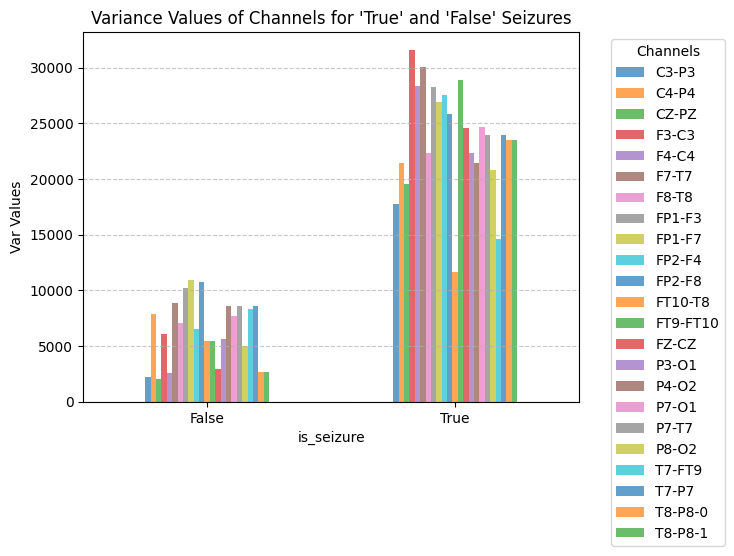

In [23]:

# Pivot the DataFrame to have channels as columns and 'is_seizure' as the index
pivoted_df = melted_data_var.pivot(index='is_seizure', columns='Channel', values='Var')

# Create a bar plot for Variance
plt.figure(figsize=(12, 6))
pivoted_df.plot(kind='bar', alpha=0.7)
plt.xlabel("is_seizure")
plt.ylabel("Var Values")
plt.title("Variance Values of Channels for 'True' and 'False' Seizures")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [28]:
grouped_var.head()

channel,is_seizure,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,False,10896.116129,8909.373698,8591.549000,7666.630311,10176.978427,6044.673022,2184.856281,5600.796358,6493.647856,...,7029.629991,2685.680406,4965.953830,2954.719418,2068.568979,8591.549000,8298.249862,5480.356361,5468.008844,2685.680406
1,True,26948.321792,30057.078289,23944.749119,24688.649110,28227.211657,31589.354518,17740.364642,22334.429946,27565.725520,...,22340.295108,23465.703238,20803.458317,24585.839849,19573.453828,23944.749119,14637.113780,28919.695959,11694.513329,23465.703238


In [ ]:
diff_df = grouped_var.iloc[0, 1:] - grouped_var.iloc[1, 1:]

# Create a new DataFrame with the differences
result_df = pd.DataFrame({'Channel': grouped_var.columns[1:], 'Variance_Difference': diff_df.values})

# Print or use the 'result_df' DataFrame
print(result_df)

<Figure size 1200x600 with 0 Axes>

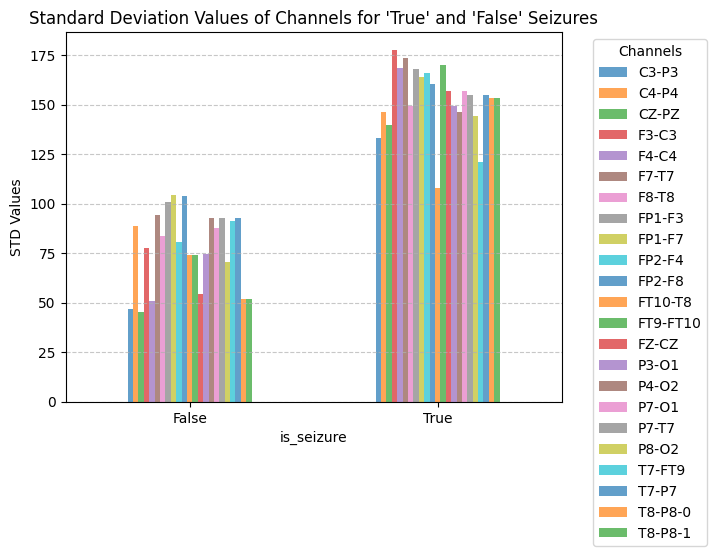

In [24]:

# Pivot the DataFrame to have channels as columns and 'is_seizure' as the index
pivoted_df = melted_data_std.pivot(index='is_seizure', columns='Channel', values='Std')

# Create a bar plot for Standard Deviation 
plt.figure(figsize=(12, 6))
pivoted_df.plot(kind='bar', alpha=0.7)
plt.xlabel("is_seizure")
plt.ylabel("STD Values")
plt.title("Standard Deviation Values of Channels for 'True' and 'False' Seizures")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

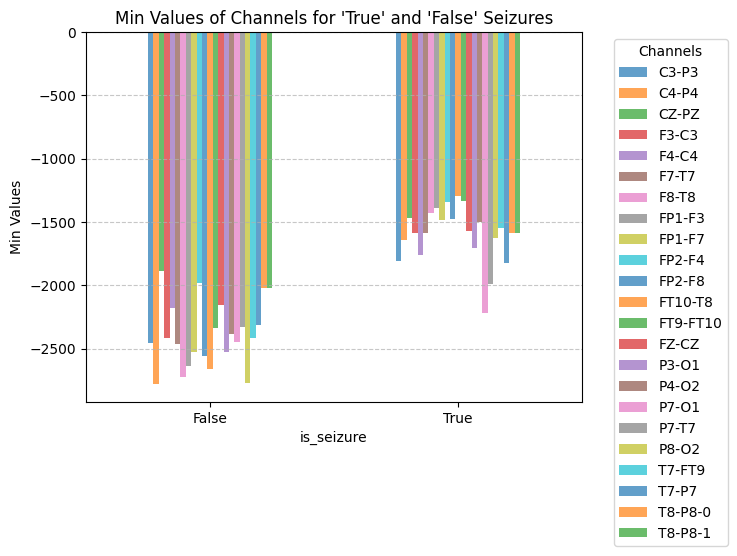

In [25]:

# Pivot the DataFrame to have channels as columns and 'is_seizure' as the index
pivoted_df = melted_data_min.pivot(index='is_seizure', columns='Channel', values='Min')

# Create a bar plot for Mean 
plt.figure(figsize=(12, 6))
pivoted_df.plot(kind='bar', alpha=0.7)
plt.xlabel("is_seizure")
plt.ylabel("Min Values")
plt.title("Min Values of Channels for 'True' and 'False' Seizures")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

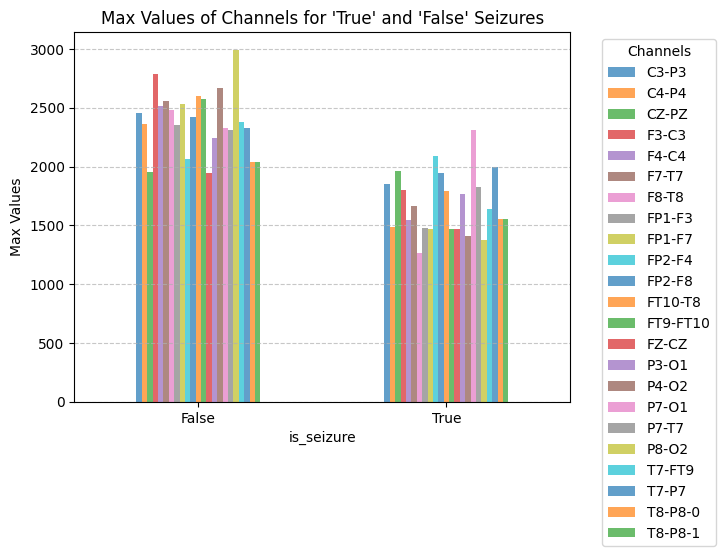

In [26]:

# Pivot the DataFrame to have channels as columns and 'is_seizure' as the index
pivoted_df = melted_data_max.pivot(index='is_seizure', columns='Channel', values='Max')

# Create a bar plot for Mean 
plt.figure(figsize=(12, 6))
pivoted_df.plot(kind='bar', alpha=0.7)
plt.xlabel("is_seizure")
plt.ylabel("Max Values")
plt.title("Max Values of Channels for 'True' and 'False' Seizures")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()